<a href="https://colab.research.google.com/github/nico-net/ProgettoSistemiDiComunicazione/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0 0 1 0 2 0 2 1 1 0]
[[0.08       0.99096308]
 [0.08       0.99096308]
 [0.52       0.11128567]
 [0.44       0.27162924]
 [0.84       0.        ]
 [1.         0.26622889]
 [0.84       0.        ]
 [0.48       0.02659694]
 [1.         0.04819088]
 [0.16       0.98562038]]
[0 0 1 0 2 0 2 1 1 0]
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2122
           1       0.99      0.99      0.99      1207
           2       0.99      0.99      0.99      1491

    accuracy                           1.00      4820
   macro avg       0.99      0.99      0.99      4820
weighted avg       1.00      1.00      1.00      4820



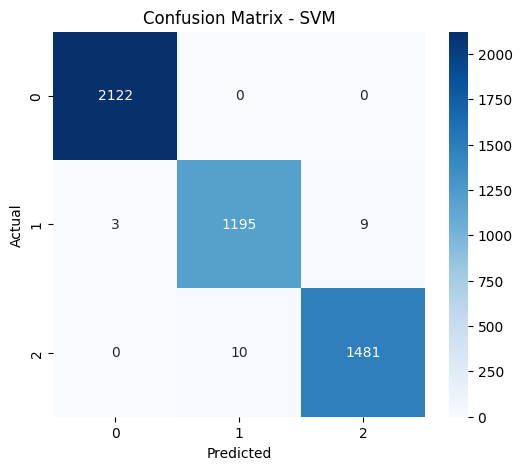

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#  1. Carica i dati
df = pd.read_csv("dati_classificati.csv")  # Sostituisci con il tuo dataset

#  2. Seleziona le feature e il target (Stato della comunicazione da 0 a 4)
features = ['SNR', 'BER']
X = df[features].values
y = df["Classe"].values  # Target (0 - pessima, 2 - ottima)

#  3. Normalizza i dati
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#  4. Dividi i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  5. Inizializza e addestra il modello SVM
svm_model = SVC(kernel="rbf", C=100, gamma="scale")  # Kernel RBF per non linearità
svm_model.fit(X_train, y_train)
print(y_test[:10]);
#X_test_notScaled = scaler.inverse_transform(X_test);
#print(X_test_notScaled[:10]);
print(X_test[:10])

#  6. Effettua le predizioni
y_pred = svm_model.predict(X_test)  # Effettua la predizione
print(y_pred[:10])  # Mostra le prime 5 righe


#  7. Valuta le performance
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  8. Matrice di confusione
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


In [ ]:

from sklearn.model_selection import GridSearchCV
parameters = {'C': [1, 10, 100], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), parameters, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Salvataggio del modello per esportarlo in matlab


In [ ]:
import pickle
# Salvataggio del modello
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


In [ ]:
X_test = [[15,1.3e-3]]  # Reshape X_test to a 2D array with one sample
X_test = scaler.transform(X_test)
svm_model.predict(X_test) # Now the predict function should work correctly.,

array([1])